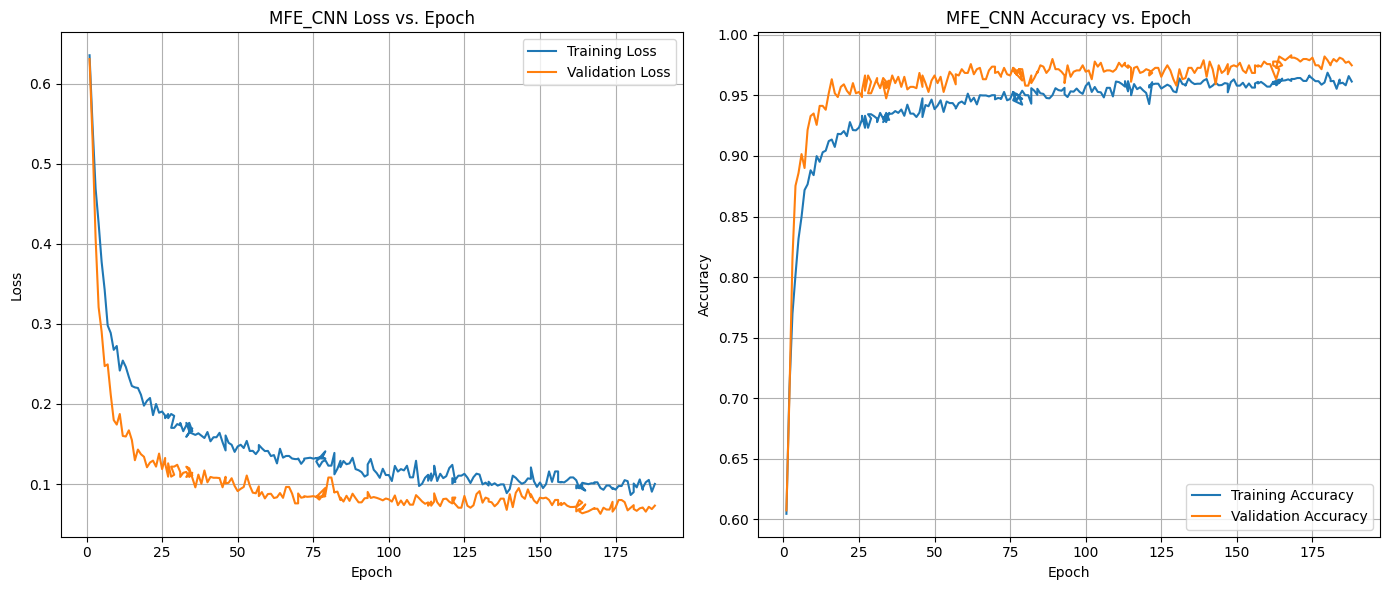

In [2]:
import re
import matplotlib.pyplot as plt
txt_file="mfe_cnn.txt"
model="mfe_cnn"
# Read the log from a file (or paste the log into a string variable)
with open(txt_file, "r") as f:
    log_text = f.read()

# Extract epoch numbers from lines like "Epoch 1/200"
epoch_nums = list(map(int, re.findall(r"Epoch (\d+)/\d+", log_text)))

# Split the log into blocks per epoch; skip the first empty block
epoch_blocks = re.split(r"Epoch \d+/\d+", log_text)[1:]

# Prepare lists to hold the metrics.
train_loss = []
train_accuracy = []
val_loss = []
val_accuracy = []

# For each epoch block, extract loss and accuracy using regex.
for block in epoch_blocks:
    # Use non-greedy matching to extract the first occurrence
    loss_match = re.search(r"loss:\s*([\d\.]+)", block)
    acc_match = re.search(r"accuracy:\s*([\d\.]+)", block)
    val_loss_match = re.search(r"val_loss:\s*([\d\.]+)", block)
    val_acc_match = re.search(r"val_accuracy:\s*([\d\.]+)", block)
    
    if loss_match and acc_match and val_loss_match and val_acc_match:
        train_loss.append(float(loss_match.group(1)))
        train_accuracy.append(float(acc_match.group(1)))
        val_loss.append(float(val_loss_match.group(1)))
        val_accuracy.append(float(val_acc_match.group(1)))

# Determine the minimum length across all lists
min_len = min(len(epoch_nums), len(train_loss), len(val_loss),
              len(train_accuracy), len(val_accuracy))

# Slice all arrays to the minimum length to avoid mismatch errors.
epoch_nums = epoch_nums[:min_len]
train_loss = train_loss[:min_len]
val_loss = val_loss[:min_len]
train_accuracy = train_accuracy[:min_len]
val_accuracy = val_accuracy[:min_len]

# Plot the training and validation loss.
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(epoch_nums, train_loss, label="Training Loss")
plt.plot(epoch_nums, val_loss, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("MFE_CNN Loss vs. Epoch")
plt.legend()
plt.grid(True)

# Plot the training and validation accuracy.
plt.subplot(1, 2, 2)
plt.plot(epoch_nums, train_accuracy, label="Training Accuracy")
plt.plot(epoch_nums, val_accuracy, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("MFE_CNN Accuracy vs. Epoch")
plt.legend()
plt.grid(True)

plt.tight_layout()
# Save the plot as an image
plt.savefig(model+".png",dpi=400)
plt.show()


<Figure size 640x480 with 0 Axes>